In [2]:
import pandas as pd
import altair as alt
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action = 'ignore', category = FutureWarning)

data = pd.read_csv('HumanTraffickingData.csv')
df = pd.DataFrame(data) 
df.head()

/var/folders/3x/2syygscs13s73scbrzl3fzpc0000gn/T/ipykernel_4001/967122564.py:8: DtypeWarning: Columns (6,55,57) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('HumanTraffickingData.csv')


,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [3]:
group_mapping = {
    'Sexual exploitation': 'Sexual Exploitation',
    'Sexual exploitation;Other': 'Sexual Exploitation',
    'Forced labour': 'Forced Labour',
    'Other': 'Other',
    'Forced labour;Sexual exploitation;Combined sexual and labour exploitation': 'Combination of Exploitation Types',
    'Slavery and similar practices': 'Slavery and Similar Practices',
    'Forced marriage': 'Forced Marriage',
    'Forced labour;Sexual exploitation;Slavery and similar practices': 'Slavery and Similar Practices',
    'Forced labour;Slavery and similar practices': 'Slavery and Similar Practices'
}

# Add a new column 'exploitation_group' based on the existing 'typeOfExploitConcatenated' column
df['exploitation_type'] = df['typeOfExploitConcatenated'].map(group_mapping)

# Optionally, if there are any NaN values, you can replace them with 'Unspecified'
df['exploitation_type'].fillna('Unspecified', inplace=True)

# Display the resulting DataFrame with the new colud
df

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,exploitation_type
0,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation
1,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation
2,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation
3,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation
4,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97745,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,Unspecified
97746,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,Unspecified
97747,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,Unspecified
97748,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,Unspecified


In [4]:
group_mapping = {
    'Financial Control': [
        'meansOfControlDebtBondage', 
        'meansOfControlTakesEarnings', 
        'meansOfControlRestrictsFinancialAccess'
    ],
    'Physical Control': [
        'meansOfControlPhysicalAbuse', 
        'meansOfControlRestrictsMovement', 
        'meansOfControlExcessiveWorkingHours', 
        'meansOfControlUsesChildren', 
        'meansOfControlRestrictsMedicalCare'
    ],
    'Psychological Control': [
        'meansOfControlThreats', 
        'meansOfControlPsychologicalAbuse', 
        'meansOfControlFalsePromises', 
        'meansOfControlPsychoactiveSubstances'
    ],
    'Sexual Exploitation': [
        'meansOfControlSexualAbuse'
    ],
    'Other Control': [
        'meansOfControlOther', 
        'meansOfControlNotSpecified'
    ],
    'Legal/Enforcement Control': [
        'meansOfControlThreatOfLawEnforcement'
    ]
}

# function to determine the group for each row
def assign_control_group(row):
    for group, columns in group_mapping.items():
        # if any of the columns in this group are True (1), assign the group
        if any(row[col] == 1 for col in columns if col in row.index):
            return group
    return 'No Control'  



In [5]:
# apply the function to create a new column 'means_of_control_group'
df['means_of_control'] = df.apply(assign_control_group, axis=1)

# display the updated dataframe with the new group column
df

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,exploitation_type,means_of_control
0,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,Other Control
1,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,Other Control
2,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,Other Control
3,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,Other Control
4,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,Other Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97745,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,No Control
97746,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,No Control
97747,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,No Control
97748,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,No Control


In [6]:
df['ageBroad'] = df['ageBroad'].str.replace('--', '-')


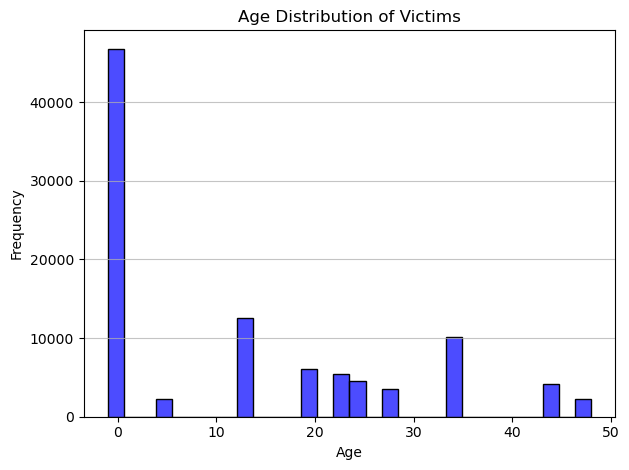

In [7]:
age_range_mapping = {
    '0-8': 4,   # Midpoint of 0 and 8
    '9-17': 13,  # Midpoint of 9 and 17
    '18-20': 19,  # Midpoint of 18 and 20
    '21-23': 22,  # Midpoint of 21 and 23
    '24-26': 25,  # Midpoint of 24 and 26
    '27-29': 28,  # Midpoint of 27 and 29
    '30-38': 34,  # Midpoint of 30 and 38
    '39-47': 44,  # Midpoint of 39 and 47
    '48+': 48      # Midpoint of 48+
}


df['ageBroad'] = df['ageBroad'].str.replace('--', '-', regex=False)


df['ageBroadAvg'] = df['ageBroad'].replace(age_range_mapping)


df['ageBroadAvg'] = pd.to_numeric(df['ageBroadAvg'], errors='coerce')


df['ageBroadAvg'].fillna(-1, inplace=True)


sns.histplot(df['ageBroadAvg'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Victims')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()


plt.show()

In [8]:
recruitment_col = [
    'RecruiterRelationship', 
    'CountryOfExploitation', 
    'recruiterRelationIntimatePartner', 
    'recruiterRelationFriend', 
    'recruiterRelationFamily', 
    'recruiterRelationOther', 
    'recruiterRelationUnknown'
]

# create a new column 'combined_values' with the appropriate values
def get_combined_value(row):
    # get the column names where the value is 1
    present_columns = [col for col in recruitment_col if row[col] == 1]
    
    if len(present_columns) > 1:
        return 'Multiple Recruitment Methods'  
    elif len(present_columns) == 1:
        return present_columns[0]  
    else:
        return None  # If no method is present

# apply the function to each row and create the 'combined_values' column
df['recruitment'] = df.apply(get_combined_value, axis=1)




In [9]:
columns_to_keep = ['yearOfRegistration', 'gender', 'means_of_control', 'ageBroadAvg', 'exploitation_type', 'citizenship', 'majorityStatus', 'isAbduction',  'majorityStatusAtExploit', 'CountryOfExploitation', 'recruitment']



existing_columns = [col for col in columns_to_keep if col in df.columns]
df_clean = df[existing_columns]


df_clean.head()



,yearOfRegistration,gender,means_of_control,ageBroadAvg,exploitation_type,citizenship,majorityStatus,isAbduction,majorityStatusAtExploit,CountryOfExploitation,recruitment
0,2002.0,Female,Other Control,19.0,Sexual Exploitation,CO,Adult,0.0,NaN,NaN,recruiterRelationUnknown
1,2002.0,Female,Other Control,19.0,Sexual Exploitation,CO,Adult,0.0,NaN,NaN,recruiterRelationUnknown
2,2002.0,Female,Other Control,19.0,Sexual Exploitation,CO,Adult,0.0,NaN,NaN,recruiterRelationUnknown
3,2002.0,Female,Other Control,19.0,Sexual Exploitation,CO,Adult,0.0,NaN,NaN,recruiterRelationUnknown
4,2002.0,Female,Other Control,19.0,Sexual Exploitation,CO,Adult,0.0,NaN,NaN,recruiterRelationUnknown


In [10]:
df

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,exploitation_type,means_of_control,ageBroadAvg,recruitment
0,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,Other Control,19.0,recruiterRelationUnknown
1,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,Other Control,19.0,recruiterRelationUnknown
2,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,Other Control,19.0,recruiterRelationUnknown
3,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,Other Control,19.0,recruiterRelationUnknown
4,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,Other Control,19.0,recruiterRelationUnknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97745,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,No Control,13.0,recruiterRelationUnknown
97746,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,No Control,13.0,recruiterRelationUnknown
97747,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,No Control,13.0,recruiterRelationUnknown
97748,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,No Control,13.0,recruiterRelationUnknown


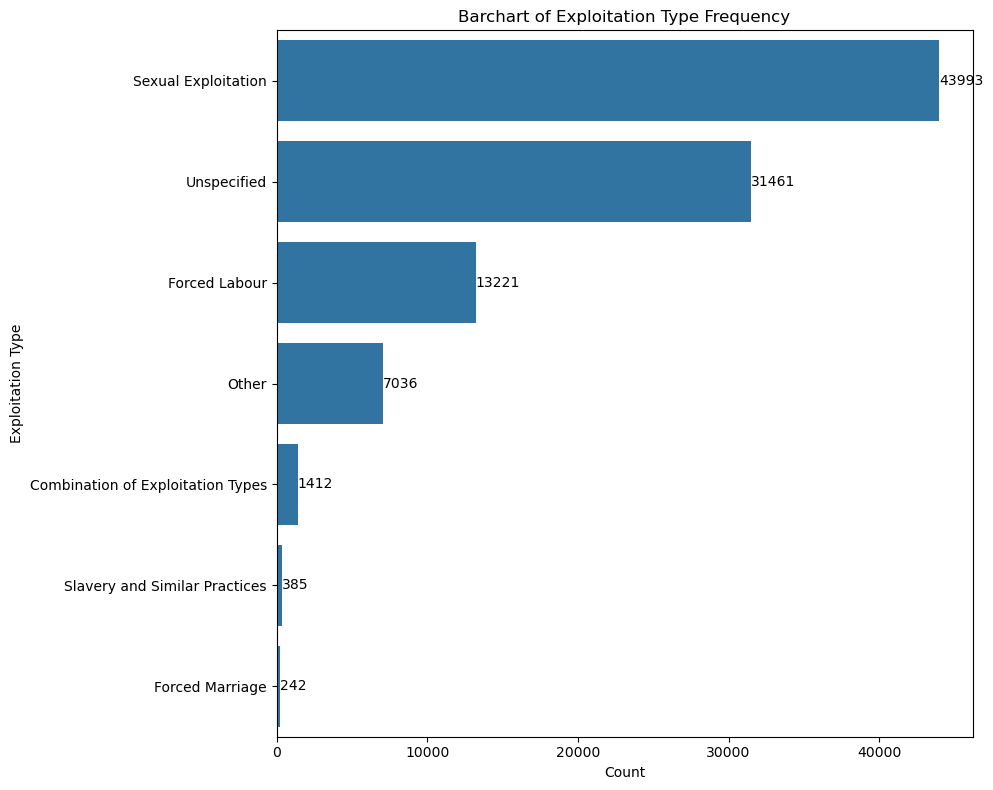

In [11]:
counts = df_clean['exploitation_type'].value_counts()

# horizontal countplot
plt.figure(figsize=(10, 8)) 
fig1 = sns.countplot(y='exploitation_type', data=df_clean)  

# add count labels to the bars
for i, value in enumerate(counts.values): 
    plt.text(value + 1, i, f'{value}', va='center')

# set labels and title
plt.xlabel('Count')
plt.ylabel('Exploitation Type')
plt.title('Barchart of Exploitation Type Frequency')


# show plot
plt.tight_layout() 
plt.savefig('bar_chart_horizontal.png', format='png')
plt.show()

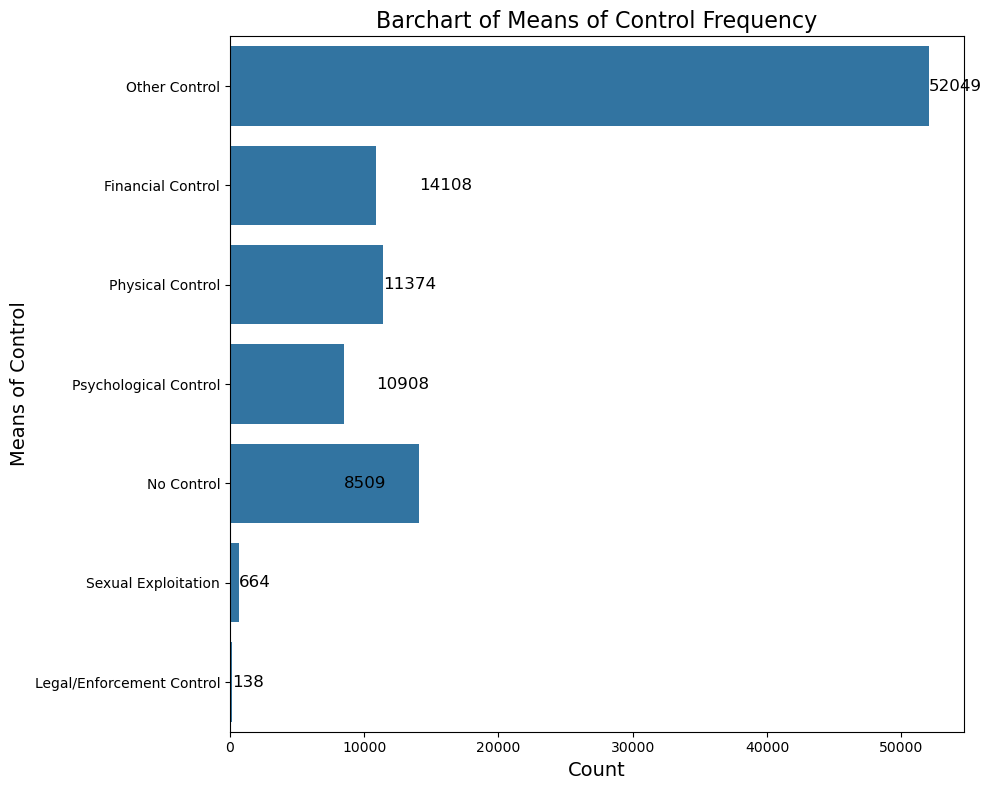

In [12]:
#counts of each exploitation type

counts = df_clean['means_of_control'].value_counts()

counts = df_clean['means_of_control'].value_counts()

# Create the horizontal countplot
plt.figure(figsize=(10, 8))  # Set figure size
fig1 = sns.countplot(y='means_of_control', data=df_clean)

# Add count labels to the bars
for i, value in enumerate(counts.values):
    plt.text(value + 0.5, i, f'{value}', va='center', fontsize=12, color='black')

# Set labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Means of Control', fontsize=14)
plt.title('Barchart of Means of Control Frequency', fontsize=16)


# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [13]:
proportion_table = pd.crosstab(df_clean['exploitation_type'], df_clean['gender'], normalize = "index")
proportion_table

gender,Female,Male,Transgender/NonConforming
exploitation_type,,,
Combination of Exploitation Types,0.973743,0.026257,0.000000
Forced Labour,0.423204,0.576796,0.000000
Forced Marriage,1.000000,0.000000,0.000000
Other,0.687180,0.312820,0.000000
Sexual Exploitation,0.955554,0.042899,0.001547
Slavery and Similar Practices,0.797403,0.202597,0.000000
Unspecified,0.602732,0.397268,0.000000


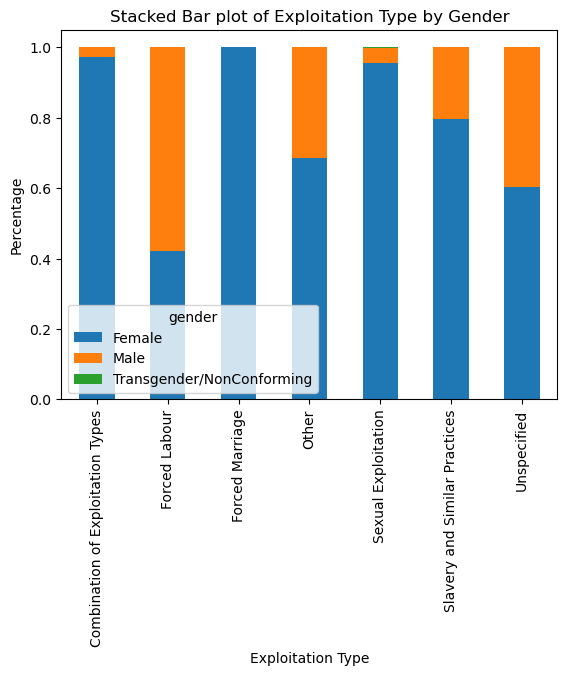

In [14]:
proportion_table.plot(kind = 'bar', stacked = True)
plt.xlabel('Exploitation Type')
plt.ylabel('Percentage')
plt.title('Stacked Bar plot of Exploitation Type by Gender')
plt.show()



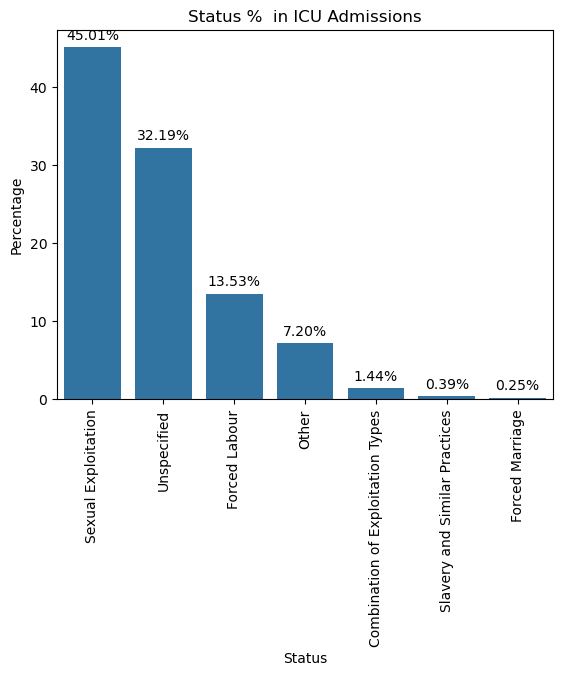

In [15]:
control_counts = df['exploitation_type'].value_counts(normalize = True)*100
control_counts

sns.barplot(x=control_counts.index, y = control_counts.values)
for i, value in enumerate(control_counts.values): 
        plt.text(i, value+1, f'{value:.2f}%', ha = 'center')
    
plt.xlabel('Status')
plt.xticks(rotation = 90)
plt.ylabel('Percentage')
plt.title('Status %  in ICU Admissions')
plt.show()

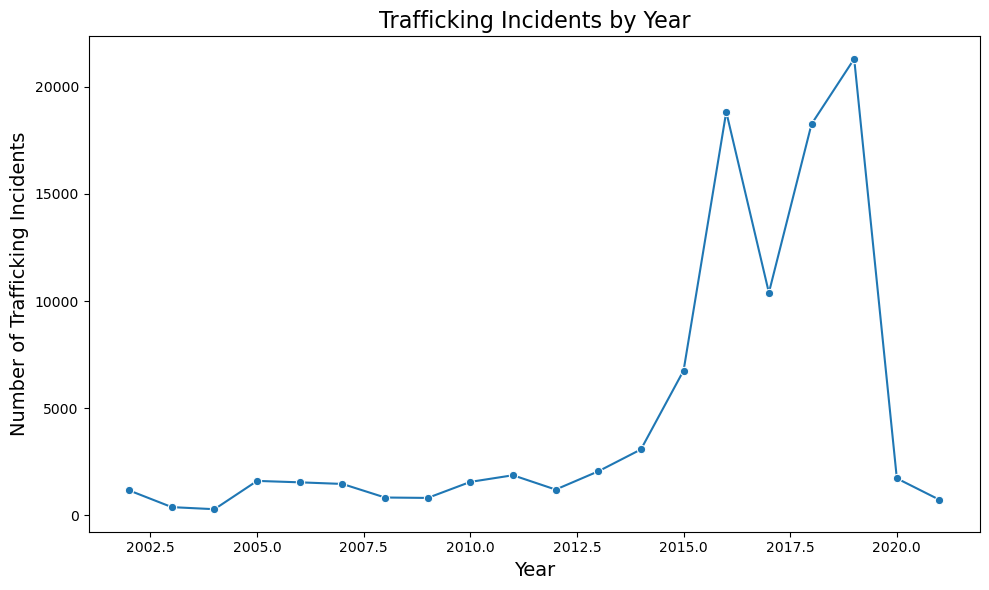

In [16]:
yearly_counts = df_clean['yearOfRegistration'].value_counts().sort_index()

# create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')

# set labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Trafficking Incidents', fontsize=14)
plt.title('Trafficking Incidents by Year', fontsize=16)

# show the plot
plt.tight_layout()
plt.show()

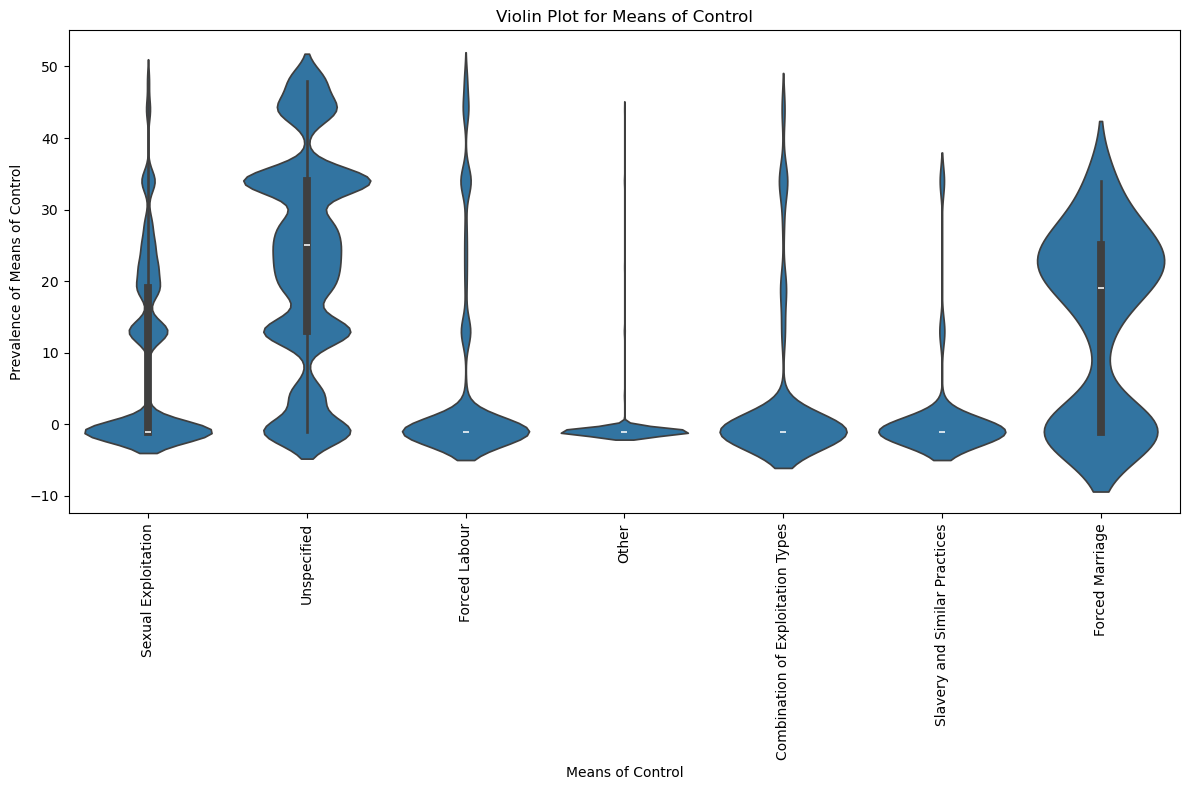

In [17]:


# create the violin plot with boxplots
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, y='ageBroadAvg', x='exploitation_type', scale='width', inner="box")

# customize the plot
plt.title('Violin Plot for Means of Control')
plt.ylabel('Prevalence of Means of Control')
plt.xlabel('Means of Control')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


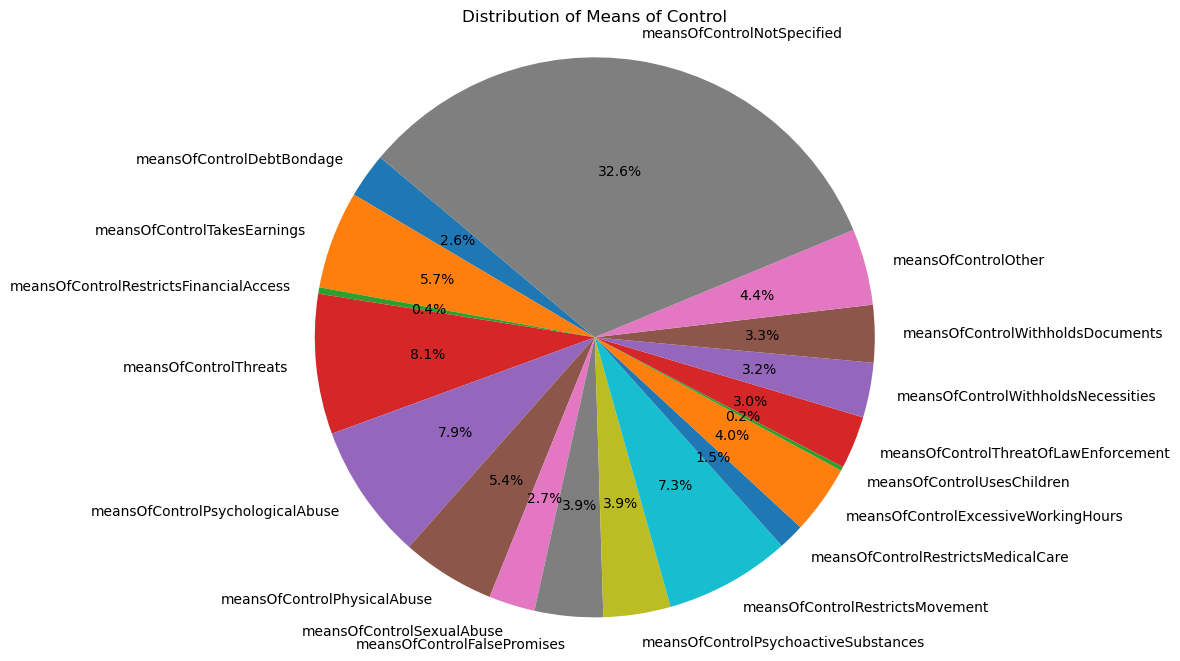

In [18]:
data = {
    'meansOfControlDebtBondage': df['meansOfControlDebtBondage'],
    'meansOfControlTakesEarnings': df['meansOfControlTakesEarnings'],
    'meansOfControlRestrictsFinancialAccess': df['meansOfControlRestrictsFinancialAccess'],
    'meansOfControlThreats': df['meansOfControlThreats'],
    'meansOfControlPsychologicalAbuse': df['meansOfControlPsychologicalAbuse'],
    'meansOfControlPhysicalAbuse': df['meansOfControlPhysicalAbuse'],
    'meansOfControlSexualAbuse': df['meansOfControlSexualAbuse'],
    'meansOfControlFalsePromises': df['meansOfControlFalsePromises'],
    'meansOfControlPsychoactiveSubstances': df['meansOfControlPsychoactiveSubstances'],
    'meansOfControlRestrictsMovement': df['meansOfControlRestrictsMovement'],
    'meansOfControlRestrictsMedicalCare': df['meansOfControlRestrictsMedicalCare'],
    'meansOfControlExcessiveWorkingHours': df['meansOfControlExcessiveWorkingHours'],
    'meansOfControlUsesChildren': df['meansOfControlUsesChildren'],
    'meansOfControlThreatOfLawEnforcement': df['meansOfControlThreatOfLawEnforcement'],
    'meansOfControlWithholdsNecessities': df['meansOfControlWithholdsNecessities'],
    'meansOfControlWithholdsDocuments': df['meansOfControlWithholdsDocuments'],
    'meansOfControlOther': df['meansOfControlOther'],
    'meansOfControlNotSpecified': df['meansOfControlNotSpecified']
}



df_pie = pd.DataFrame(data)

# Calculate total for each means of control
totals = df_pie.sum()


# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Means of Control')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()

In [19]:
import pandas as pd
import numpy as np

# Assuming 'df' is your dataset
# Recalculate 'Total Cases' if not already done
df['isForcedLabour'] = df['isForcedLabour'].fillna(0)
df['isSexualExploit'] = df['isSexualExploit'].fillna(0)
df['isOtherExploit'] = df['isOtherExploit'].fillna(0)

# Calculate Total Cases
df['Total Cases'] = df['isForcedLabour'] + df['isSexualExploit'] + df['isOtherExploit']

# Group by 'CountryOfExploitation' to calculate total cases per country
country_totals = df.groupby('CountryOfExploitation', as_index=False)['Total Cases'].sum()

# Display the results
print(country_totals)

# Optionally save the results to a CSV file for later use
country_totals.to_csv('country_total_cases.csv', index=False)

print("Total cases per country saved to 'country_total_cases.csv'")

   CountryOfExploitation  Total Cases
0                     AE        515.0
1                     AF         58.0
2                     AL         11.0
3                     AR          0.0
4                     AT         24.0
..                   ...          ...
72                    US      49150.0
73                    UZ          0.0
74                    VN         16.0
75                    VU          0.0
76                    ZA         36.0

[77 rows x 2 columns]
Total cases per country saved to 'country_total_cases.csv'


In [5]:
import folium
import geopandas as gpd
import pandas as pd
from branca.colormap import LinearColormap

# Path to the shapefile
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

# Load the Natural Earth shapefile
world = gpd.read_file(shapefile)

# Create the DataFrame with CountryOfExploitation and Total Cases
df = pd.DataFrame({
    'CountryOfExploitation': [
        'AE', 'AF', 'AL', 'AR', 'AT', 'BA', 'BD', 'BG', 'BH', 'BI', 'BY', 'CI', 'CL', 'CN', 'CY', 'CZ',
        'DE', 'DK', 'EC', 'EG', 'ET', 'FR', 'GA', 'GH', 'HK', 'HT', 'ID', 'IN', 'IQ', 'IT', 'JO', 'JP',
        'KE', 'KH', 'KW', 'KZ', 'LB', 'LY', 'MA', 'MG', 'MK', 'ML', 'MU', 'MW', 'MX', 'MY', 'NE', 'NG',
        'OM', 'PH', 'PL', 'QA', 'RO', 'RS', 'RU', 'SA', 'SD', 'SE', 'SG', 'SL', 'SN', 'SY', 'TH', 'TJ',
        'TM', 'TN', 'TR', 'TT', 'TW', 'TZ', 'UA', 'UG', 'US', 'UZ', 'VN', 'VU', 'ZA'
    ],
    'Total Cases': [
        515.0, 58.0, 11.0, 0.0, 24.0, 127.0, 145.0, 130.0, 22.0, 0.0, 33.0, 0.0, 0.0, 25.0, 12.0, 54.0,
        0.0, 17.0, 0.0, 51.0, 0.0, 0.0, 0.0, 538.0, 43.0, 272.0, 1678.0, 106.0, 0.0, 26.0, 108.0, 111.0,
        24.0, 983.0, 185.0, 163.0, 94.0, 795.0, 0.0, 0.0, 194.0, 325.0, 0.0, 0.0, 0.0, 369.0, 0.0, 0.0,
        94.0, 1842.0, 434.0, 239.0, 108.0, 249.0, 3156.0, 357.0, 0.0, 0.0, 37.0, 0.0, 33.0, 41.0, 43.0,
        0.0, 0.0, 0.0, 258.0, 85.0, 33.0, 0.0, 0.0, 140.0, 49150.0, 0.0, 16.0, 0.0, 36.0
    ]
})

# Map ISO-2 to ISO-3 country codes
import pycountry
iso_mapping = {country.alpha_2: country.alpha_3 for country in pycountry.countries}
df['CountryISO3'] = df['CountryOfExploitation'].map(iso_mapping)

# Merge the shapefile with the data
world_merged = world.merge(df, how='left', left_on='ADM0_A3', right_on='CountryISO3')
world_merged['Total Cases'] = world_merged['Total Cases'].fillna(0)

# Initialize the Folium map
m = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron")

# Create a linear colormap for Total Cases
colormap = LinearColormap(
    colors=['yellow', 'orange', 'red'], 
    vmin=world_merged['Total Cases'].min(),
    vmax=world_merged['Total Cases'].max(),
    caption="Total Cases"
)

# Add the colormap to the map
colormap.add_to(m)

# Function to style the GeoJSON layer
def style_function(feature):
    total_cases = feature['properties']['Total Cases']
    if total_cases == 0:
        return {
            'fillColor': 'none',  # No fill for missing data
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0
        }
    return {
        'fillColor': colormap(total_cases),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    }

# Add a GeoJSON layer with popups
folium.GeoJson(
    world_merged,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['ADM0_A3', 'Total Cases'],
        aliases=['Country Code:', 'Total Cases:'],
        localize=True
    )
).add_to(m)

# Save the map
m.save('interactive_map_with_clickable_values.html')

# Display the map object (if running in a Jupyter notebook)
m

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group data by year and gender, then count incidents
gender_yearly_counts = df_clean.groupby(['yearOfRegistration', 'gender']).size().unstack().fillna(0)

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_yearly_counts, markers=True)

for gender in gender_yearly_counts.columns:
    max_year = gender_yearly_counts[gender].idxmax()
    max_value = gender_yearly_counts[gender].max()

# Relevant global changes
plt.axvspan(2008, 2010, color='yellow', alpha=0.2, label='Global Economic Crisis')
plt.axvspan(2015, 2018, color='blue', alpha=0.1, label='Awareness Campaigns')
plt.legend(fontsize=10)

# Labels, legend, and title
plt.xlabel('Year of Registration', fontsize=14)
plt.ylabel('Number of Trafficking Incidents', fontsize=14)
plt.title('Trafficking Incidents by Gender and Year', fontsize=16)
plt.legend(title='Gender', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Plot
plt.tight_layout()
plt.show()


In [25]:
import altair as alt
import pandas as pd

# Prepare the data for Altair
gender_yearly_counts = df_clean.groupby(['yearOfRegistration', 'gender']).size().reset_index(name='count')

# Create a dropdown filter
gender_dropdown = alt.binding_select(options=gender_yearly_counts['gender'].unique(), name='Select Gender: ')
gender_selection = alt.selection_single(fields=['gender'], bind=gender_dropdown)

# Base chart
base_chart = alt.Chart(gender_yearly_counts).mark_line(point=True).encode(
    x=alt.X('yearOfRegistration:O', title='Year of Registration'),
    y=alt.Y('count:Q', title='Number of Trafficking Incidents'),
    color=alt.Color('gender:N', legend=None),  # Remove color legend for simplicity
    tooltip=['yearOfRegistration:O', 'gender:N', 'count:Q']
).properties(
    width=400,
    height=400,
    title='Trafficking Incidents by Gender and Year'
).add_selection(
    gender_selection
).transform_filter(
    gender_selection
)

# Zooming and panning
zoom_chart = base_chart.interactive()

# Display the chart
zoom_chart.save('interactive_trafficking_incidents_by_gender.html')
zoom_chart

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HumanTraffickingData.csv')

# Group by type of trafficking and gender, and calculate counts
data = df.groupby(['typeOfExploitConcatenated', 'gender']).size().reset_index(name='count')

# Save data to JSON for D3.js barchart
data.to_json('trafficking_data.json', orient='records')
